In [1]:
import gdal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#my code
from raster_sample import *
from profile_map_scanner import *




In [16]:
#Import the data
raster_path = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Cache_creek/"
raster = gdal.Open(raster_path + "/Cache_creek_clip_HS.bil")#Get raster data

dem = raster.ReadAsArray()


creek= "Crack_canyon"
path = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Cache_creek/Previous_LSDTT_version/Channel_extraction/"+creek+"/" #Set path to data

## IMPORT DATA
creek= "Crack_canyon"
path = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Cache_creek/Previous_LSDTT_version/Channel_extraction/"+creek+"/" #Set path to data
name = creek+"_MChiSegmented.csv" #Set file name
creek_data = np.genfromtxt((path+name), delimiter=',', skip_header=1, names=['node', 'row', 'col', 'latitude', 'longitude', 'chi', 'elevation', 'flow_distance', 'drainage_area', 'm_chi', 'b_chi', 'source_key', 'basin_key', 'segmented_elevation'])

#Create pandas dataframe
creek_data_df = pd.DataFrame(creek_data)

#Create a distance column in pandas dataframe
distance = creek_data_df['flow_distance'] - creek_data_df['flow_distance'].min()
creek_data_df['distance'] = distance

#convert the lat long to utm from creek data, chi segmented (only need this if there is no x, y columns)
creek_data_df = convert_lat_long(creek_data_df)

In [9]:
#Create a bokeh plot of the raster
import bokeh.plotting as bp
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import gridplot, column


#pull out the products of raster subsampler
X,Y, array = raster_subsample_xy_generator(raster, creek_data_df)

#Create a bokeh source to use in interactive plots
source=bp.ColumnDataSource(creek_data_df)
color_by_variable('m_chi', source=source) #define color scheme for profiles

#define boundaries of the data
x_range, y_range = define_boundaries(source)
elev_range = define_elevation_boundaries(source)


#Create profile plots 

p = stream_map_raster(array, source, title='Map',x_axis_label='Easting', y_axis_label='Northing')

p2 = profile(elev_range, source, title='Elevation profile', x_axis_label='Distance', y_axis_label='Elevation')

p3 = profile(elev_range, source, x='chi', title='Chi profile', x_axis_label='Chi', y_axis_label='Elevation')


output_file("Profile comparison.html", title="Creek scanner")

plotcol = column(p2, p3)
grid = gridplot([[p, plotcol]])

bp.show(grid)  


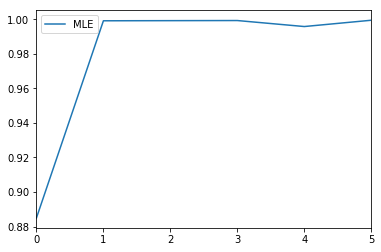

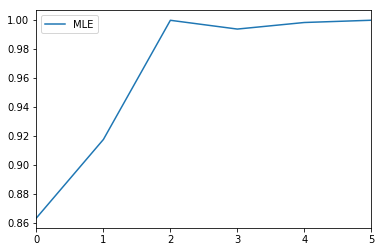

In [153]:
#Import data for plotting best m/n ratio

#appended_data = []
#for i in range(1,9):
num = '0.8'
name2 = path+creek+'_movernstats_'+num+'_fullstats.csv'
mle_data = np.genfromtxt(name2, delimiter=',', skip_header=1, names=['basin_key', 'reference_source_key', 'test_source_key','MLE','RMSE'])

#Convert data into pandas dataframe and remove some columns and change column names to match m/n ratio values
df8 = pd.DataFrame(mle_data)

    #del df['basin_key']
    #del df['reference_source_key']
    #df = df.rename(columns={'test_source_key': 'Tributary #', 'MLE':'MLE '+num, 'RMSE':'RMSE '+num})

    #appended_data.append(df)
    #df_appended = pd.concat(appended_data,axis=1)
#df = pd.DataFrame({'x': x, 'y': y})
# df.head()
# df.dtypes
# #df_appended.head()
section2 = df2[['MLE']]
# checking.head()

fig = plt.figure()
section.plot()
section2.plot()
plt.show()

In [89]:
x='MLE 0.1'
x

'MLE 0.1'

In [29]:
#df = pd.DataFrame(mle_data)
df = pd.concat([df,df2],axis=1)
df.head()

,basin_key,reference_source_key,test_source_key,MLE,RMSE,basin_key,reference_source_key,test_source_key,MLE,RMSE,basin_key,reference_source_key,test_source_key,MLE,RMSE
0,0.0,0.0,1.0,0.885031,25.12740,0.0,0.0,1.0,0.863379,27.56530,0.0,0.0,1.0,0.863379,27.56530
1,0.0,0.0,2.0,0.999108,21.11510,0.0,0.0,2.0,0.917517,51.67050,0.0,0.0,2.0,0.917517,51.67050
2,0.0,0.0,3.0,0.999182,5.86660,0.0,0.0,3.0,0.999737,3.44055,0.0,0.0,3.0,0.999737,3.44055
3,0.0,0.0,4.0,0.999249,4.37886,0.0,0.0,4.0,0.993682,10.57950,0.0,0.0,4.0,0.993682,10.57950
4,0.0,0.0,5.0,0.995779,11.17650,0.0,0.0,5.0,0.998214,7.32162,0.0,0.0,5.0,0.998214,7.32162
